### 전국어린이보호구역표준데이터
- 시설종류별 CCTV 설치 여부 카운트 / 대수
- 광역시도별, 시설종류별 카운트
- 관할경찰서별 CCTV 평균 설치대수
- CCTV 평균 설치대수
- 도로폭 / CCTV 설치대수 상관도

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn 
# pip install scikit-learn
from sklearn import datasets

# x = datasets.load_diabetes()
# print(x['DESCR'])

pd_rawdata = pd.read_csv('전국어린이보호구역표준데이터.csv', encoding='cp949')

#print(pd_rawdata.columns)

column_selection = ['시설종류', '관할경찰서명', 'CCTV설치여부','CCTV설치대수','제공기관명', '보호구역도로폭']
pd_data = pd_rawdata[column_selection]
del pd_rawdata
#print(pd_rawdata[:3])

In [3]:
# EDA : Exploratory Data Analtsis

print(pd_data.columns)
print(pd_data.dtypes)

print(pd_data['보호구역도로폭'].value_counts())
print(pd_data['보호구역도로폭'].isna().value_counts())

pd_data['시설종류'] = pd_data['시설종류'].astype('category')
pd_data['CCTV설치여부'] = pd_data['CCTV설치여부'].astype('category')
#print(pd_data.dtypes)

Index(['시설종류', '관할경찰서명', 'CCTV설치여부', 'CCTV설치대수', '제공기관명', '보호구역도로폭'], dtype='object')
시설종류         object
관할경찰서명       object
CCTV설치여부     object
CCTV설치대수    float64
제공기관명        object
보호구역도로폭      object
dtype: object
6          1600
8          1334
7           855
10          558
12          543
           ... 
30~35         1
12~50         1
5.0~5.5       1
6~45          1
18~23         1
Name: 보호구역도로폭, Length: 528, dtype: int64
False    10684
True      4372
Name: 보호구역도로폭, dtype: int64


In [4]:
# 결측치 확인

# print(pd_data.shape)
# print(pd_data.describe(include='all'))

for e in pd_data:
    print(e, pd_data[e].hasnans)
    if pd_data[e].hasnans==True:
        print(pd_data[e].isna().value_counts())

시설종류 False
관할경찰서명 False
CCTV설치여부 False
CCTV설치대수 True
False    11682
True      3374
Name: CCTV설치대수, dtype: int64
제공기관명 False
보호구역도로폭 True
False    10684
True      4372
Name: 보호구역도로폭, dtype: int64


In [5]:
# CCTV 설치대수: 결측치 처리
# CCTV 설치여부 Y --> 1
# CCTV 설치여부 N --> 0
print(pd_data['CCTV설치대수'].isna().value_counts())

filter_y = pd_data['CCTV설치여부'] == 'Y'
filter_n = pd_data['CCTV설치여부'] == 'N'

pd_data.loc[filter_y, 'CCTV설치대수'] = pd_data.loc[filter_y,  'CCTV설치대수'].replace(np.NaN, 1)
pd_data.loc[filter_n, 'CCTV설치대수'] = pd_data.loc[filter_n,  'CCTV설치대수'].replace(np.NaN, 0)

# pd_data.replace({'CCTV설치여부':'Y', 'CCTV설치대수':np.NaN}, 1, inplace=True)
# pd_data.replace({'CCTV설치여부':'N', 'CCTV설치대수':np.NaN}, 0, inplace=True)

print(pd_data['CCTV설치대수'].isna().value_counts())

False    11682
True      3374
Name: CCTV설치대수, dtype: int64
False    15056
Name: CCTV설치대수, dtype: int64


In [6]:
def myfn1(x):
    if type(x) == type(' '):
        if '~' in x:
            m = np.array(x.split('~')).astype(np.float64).mean()
            return str(m)

        
# 도로폭: 오류치 처리
# '숫자a ~ 숫자b' 형태의 문자열 --> '숫자 a'와 '숫자b'의 평균치(np.float64) 값으로 대체
# print(pd_data['보호구역도로폭'].value_counts())
y = pd_data['보호구역도로폭'].apply(myfn1)
#print(y.dtype)
#print(y.value_counts())


# 도로폭: 결측치 처리
# 전체 도로폭 평균치로 대체
print(pd_data['보호구역도로폭'].isna().value_counts())
y = y.astype(np.float64)
y = y.replace(np.NaN, y.mean())
print(y.isna().value_counts())
pd_data['보호구역도로폭'] = y

False    10684
True      4372
Name: 보호구역도로폭, dtype: int64
False    15056
Name: 보호구역도로폭, dtype: int64


In [7]:
for e in pd_data:
    print(e, pd_data[e].hasnans)
    if pd_data[e].hasnans == True:
        print(pd_data[e].isna().value_counts())

시설종류 False
관할경찰서명 False
CCTV설치여부 False
CCTV설치대수 False
제공기관명 False
보호구역도로폭 False


### 시설종류
* dtype: category
* value: 
* 결측치 없음


### 관할경찰서명
* dtype: object
* 결측치 없음

### CCTV 설치여부
* dtype: category
* value: 'Y', 'N'
* 결측치 없음

### CCTV 설치대수
* dtype: np.int64
* min / max: 0 / _
* 결측치 (개) -> 처리 후 결측치 없음
    CCTV 설치여부 'Y' --> 1
    CCTV 설치여부 'N' --> 0

### 보호구역도로폭
* dtype: np.float64
* min / max: 
* 오류치 ( 개) -> 처리 후 결측치 없음

    '숫자a ~ 숫자b' 형태의 문자열 --> '숫자 a'와 '숫자b'의 평균치(np.float64) 값으로 대체

* 결측치 ( 개) -> 처리 후 결측치 없음

    전체 평균값으로 대체

In [8]:
# print(pd_data)
# print(pd_data['보호구역도로폭'].value_counts())
g1 = pd_data.groupby('시설종류')
# print(g1)
# g1.count()
# g1['CCTV설치대수'].sum()

In [9]:
g2 = pd_data.groupby(['제공기관명', '시설종류'])
g2.count()

관할경찰서명  CCTV설치여부  CCTV설치대수  보호구역도로폭
제공기관명    시설종류                                          
강원도 강릉시  국제학교            0         0         0        0
         대안학교            0         0         0        0
         어린이집            6         6         6        6
         외국인교육기관         0         0         0        0
         외국인학교           0         0         0        0
...                    ...       ...       ...      ...
충청북도 충주시 유치원            44        44        44       44
         초등학교           38        38        38       38
         초등학교+어린이집       0         0         0        0
         특수학교            3         3         3        3
         학원              0         0         0        0

[2250 rows x 4 columns]

In [10]:
pd_data['CCTV설치대수'].mean()

2.118026036131775

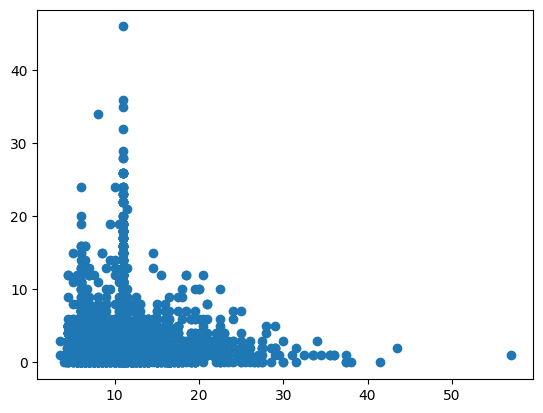

In [11]:
x = pd_data['보호구역도로폭']
y = pd_data['CCTV설치대수']
np.corrcoef(x, y)
_, axe = plt.subplots()
axe.scatter(x, y)

In [13]:
# 조건 1개 : column a의 값이 1
# 교체대상 column b의 값
df_t  = pd.DataFrame({'a':[1,1,2,2], 'b': [5,6,5,6]})
print(df_t)

f1 = df_t['a'] ==1  #column a의 값이 1인것만 필터
print('******')
#b의 값을 변경
print(df_t.loc[f1, 'b']) # colunm b 중에, column a의 값이 1인것만

df_t.loc[f1, 'b'] = 100 # colunm b 중에, column a의 값이 1인것은 값 100으로 교체
print('******')
print(df_t)

   a  b
0  1  5
1  1  6
2  2  5
3  2  6
******
0    5
1    6
Name: b, dtype: int64
******
   a    b
0  1  100
1  1  100
2  2    5
3  2    6


In [16]:
# 조건 2개 : column a의 값이 1, column b의 값이 6
# 교체대상 column b의 값
df_t  = pd.DataFrame({'a':[1,1,2,2], 'b': [5,6,5,6]})
print(df_t)

f1 = df_t['a'] ==1 
print('******')
#b의 값을 변경
print(df_t.loc[f1, 'b']) 

df_t.loc[f1, 'b'] = df_t.loc[f1, 'b'].replace(6, 100) # inplace 효과 없음
print('******')
print(df_t)

   a  b
0  1  5
1  1  6
2  2  5
3  2  6
******
0    5
1    6
Name: b, dtype: int64
******
   a    b
0  1    5
1  1  100
2  2    5
3  2    6
